In [1]:
import torch
from PIL import Image
import torchvision.transforms.functional as FT
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utils import convert_image as img_to_tensor, tensor_to_img

In [2]:
imagenet_mean = torch.FloatTensor([0.485, 0.456, 0.406]).unsqueeze(1).unsqueeze(2)
imagenet_std = torch.FloatTensor([0.229, 0.224, 0.225]).unsqueeze(1).unsqueeze(2)

In [3]:
device = torch.device("cpu")

# load checkpoint
srgan_checkpoint = "./0080_2021_01_24_00_43_12.pth.tar"
srresnet_checkpoint = "./checkpoint_srresnet.pth.tar"

model = torch.load(srgan_checkpoint)['generator'].to(device).eval()

n:\Users\jorji\Miniconda3\lib\site-packages\torch\serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
n:\Users\jorji\Miniconda3\lib\site-packages\torch\serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
n:\Users\jorji\Miniconda3\lib\site-packages\torch\serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.Tanh' has changed. you can retrieve the original source code by accessing the object's source at

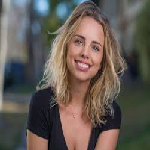

In [4]:
# load lr image
img = Image.open('./image_2/sdfdownload.jpg', mode='r').convert('RGB')
img

In [5]:
input_tensor = img_to_tensor(img, source='pil', target='imagenet-norm')

In [6]:
# create 4x image
with torch.no_grad():
    final_img = model(input_tensor.unsqueeze(0))

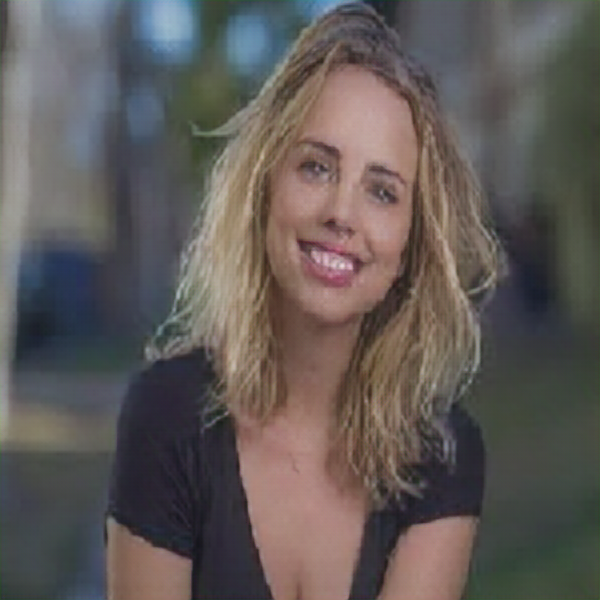

In [7]:
resized_img = tensor_to_img(final_img)
resized_img.save('4x_img.png')
resized_img